In dieser Aufgabe behandeln wir die vierteljährliche Produktion von Elektrizität.

---
a) Lesen Sie die Datei AustralianElectricity.csv in Python ein, und konvertieren Sie die Daten in das Zeitreihenformat. Zeichnen Sie die Daten auf.


In [1]:
import pandas as pd

electricity = pd.read_csv("AustralianElectricity.csv", sep=";", header=0)
electricity.head()

,Quarter,kilowatt
0,1956Q1,3923
1,1956Q2,4436
2,1956Q3,4806
3,1956Q4,4418
4,1957Q1,4339


In [2]:
import matplotlib.pyplot as plt

electricity["Quarter"] = pd.to_datetime(electricity["Quarter"])
electricity.set_index("Quarter", inplace=True)
electricity.columns = ["Electricity (kilowatt)"]
electricity.head()

,Electricity (kilowatt)
Quarter,
1956-01-01,3923
1956-04-01,4436
1956-07-01,4806
1956-10-01,4418
1957-01-01,4339


Text(0, 0.5, 'Million Kilowatthours')

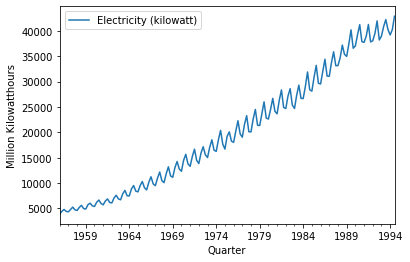

In [3]:
electricity.plot()
plt.ylabel("Million Kilowatthours")

---
b) Wenden Sie eine passende Daten-Transformation an, so dass sich die Varianz
der Zeitreihe stabilisiert wird. Hinweis: Wenden Sie die Funktion `box.cox` an,
und bestimmen Sie einen optimalen Wert für lambda, indem Sie die Graphik
der transformierten Zeitreihe betrachten. Hier ist der Code mit `lambda = 1.3`:

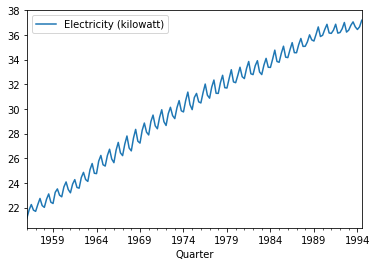

In [4]:
boxcox = lambda x, lambd: np.log(x) if (lambd==0) else (x**lambd-1)/lambd

electricity_tr = boxcox(electricity, 0.2)
electricity_tr.plot()
plt.show()

c) Zerlegen Sie die Zeitreihe in die Komponenten trend, saisonale Effekte und Residuen
mit Hilfe der Funktion `seasonal_decompose()`. Kommentieren Sie die Resultate. Denken Sie, eine Datentransformation vor der Zerlegung wäre angebracht?

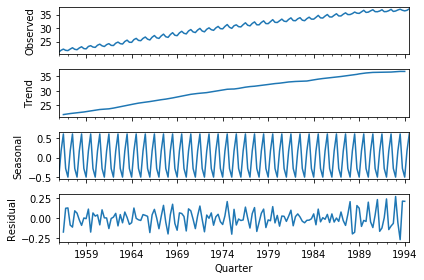

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(electricity_tr, model="additive", freq=4).plot()
plt.show()

Keine zerlegung noetig, da der residual term nicht periodisch ist und die Varianz im Sesonal term stabil konstant.

---
d) Zerlegen Sie die Zeitreihe erneut, indem Sie die Funktion `decompose()` aus
dem Paket stldecompose benützen. Wählen Sie einen geeigneten Wert für
den Parameter period. Vergleichen Sie die Resultate mit denjenigen der Teilaufgabe c).

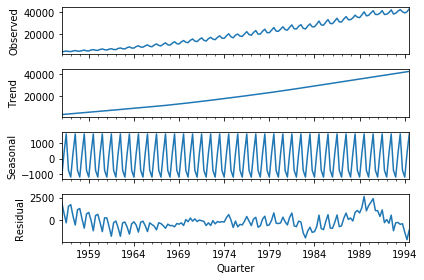

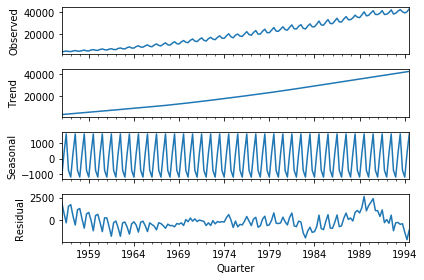

In [6]:
from stldecompose import decompose

electricity_decompose = decompose(electricity["Electricity (kilowatt)"], period=4)
electricity_decompose.plot()

Wir nehmen hier wieder den parameterwert `periode=4` da wir pro periode (also ein jahr) vier werte haben, pro quartal einen.